In [1]:
import os
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
def read_prn(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    
    splits = [_]*5
    wns_and_temps = [_]*5
    
    for i in range(5):     #find lists of wavenumbers, and each of 4 temperature sets
        splits[i] = lines[i].split()
        wns_and_temps[i] = [float(splits[i][n]) for n in range(len(splits[i]))]
        
    return wns_and_temps

In [4]:
#wns_and_temps = read_prn('//icnas4.cc.ic.ac.uk/rs5115/downloads', '(2018_09_27_12_05_06_638)_Measurement_progression.prn')
wns_and_temps_first = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_12_40_54_386)_Measurement_progression.prn')
wns_and_temps_last = read_prn('/Users/micol/Documents/Imperial/Year4/Master_Project/prn_files', '(2018_09_27_14_23_05_967)_Measurement_progression.prn')

In [5]:
def plot_temp_vs_wn(spectrum, lower_wn, upper_wn): 
    plt.plot(wns_and_temps_first[0][lower_wn:upper_wn],wns_and_temps_first[spectrum][lower_wn:upper_wn])
    plt.show()

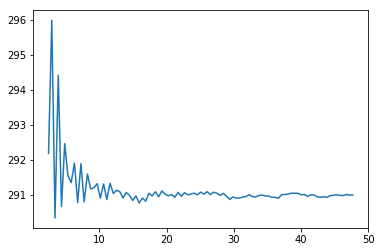

In [6]:
plot_temp_vs_wn(spectrum=1, lower_wn=5, upper_wn=100) #spectrum takes values 1-4

In [7]:
h = 6.626e-34
c = 299792458
k = 1.381e-23

def planck(wavenumber, T):
    return 2*h*(c**2)*((wavenumber*100)**3)/(np.exp(h*c*(wavenumber*100)/(k*T))-1)

In [22]:
wns_first = np.array(wns_and_temps_first[0][860:4000]) #defining the arrays of wns and temps from results 1
temps_first = np.array(wns_and_temps_first[1][860:4000])
print(np.average(temps_first)-273.15)

wns_last = np.array(wns_and_temps_last[0][860:4000]) #defining as above for results 2
temps_last = np.array(wns_and_temps_last[1][860:4000])
print(np.average(temps_last)-273.15)

planckvec = np.vectorize(planck)

21.7632226433
60.8651382166


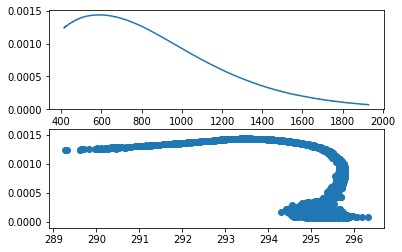

In [9]:
rad_first = planckvec(wns_first, temps_first) #radiances of first dataset

fig = plt.figure() #plot radiance as function of wavenumber
plt.subplot(2,1,1)
plt.plot(wns_first, rad_first)

plt.subplot(2,1,2)
plt.scatter(temps_first,rad_first)
plt.ylim(-0.0001,0.0016)

plt.show()

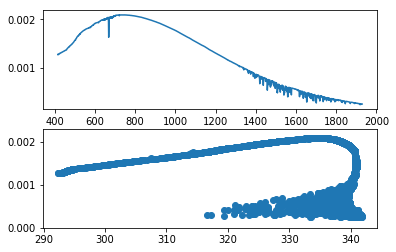

In [10]:
rad_last = planckvec(wns_last, temps_last)

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(wns_last, rad_last)

plt.subplot(2,1,2)
plt.scatter(temps_last,rad_last)
plt.ylim(0.,0.0023)

plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def plot_3d_fns_0(start, stop, azimuth=None, elevation=None): #start and stop is roughly the time in seconds
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(wns_last, rad_last, temps_last, cmap='inferno')


plot_deltas(0, wns_last[-1])

In [27]:
def planck(wavenumber, T):
    return 2*h*(c**2)*((wavenumber*100)**3)/(np.exp(h*c*(wavenumber*100)/(k*T))-1)

def plot_planck_first(temp):
    wavenums = np.array(wns_first)
    radiances = []
    
    for w in wavenums:
        radiances.append(planck(w,temp))
    
    plt.plot(wavenums, radiances)
    
def plot_planck_last(temp):
    wavenums = np.array(wns_last)
    radiances_last = []
    
    for w in wavenums:
        radiances_last.append(planck(w,temp))
    
    plt.plot(wavenums, radiances_last)    


def plot_3d_fn(start, stop, azimuth=None, elevation=None): #start and stop is roughly the time in seconds
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(wns_first, temps_first, rad_first, cmap='inferno')
    ax.set_xlabel('Wavenumber')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Radiance')

plot_3d_fn(0, wns_first[-1])

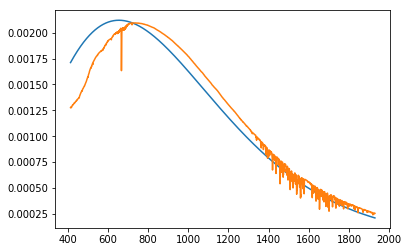

In [28]:
plot_planck_last(np.average(temps_last))
plt.plot(wns_last, rad_last)
plt.show()

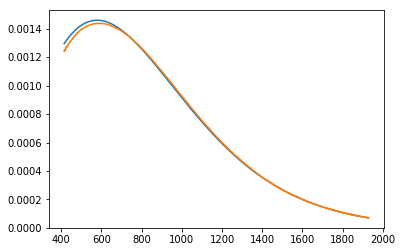

In [29]:
plot_planck_last(np.average(temps_first))
plt.plot(wns_first, rad_first)
plt.show()

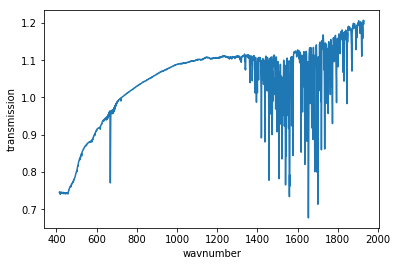

In [36]:
def transmission_fn(temp):
    wavenums_last = np.array(wns_last)
    real_radiances = rad_last
    theory_radiances = []

    for w in wavenums_last:
        theory_radiances.append(planck(w,temp))
    
    def division(real_val,theory_val):
        return real_val/theory_val
    
    division_vec = np.vectorize(division)
    
    ratio = division_vec(real_radiances, theory_radiances)
    plt.plot(wavenums_last, ratio)
    plt.xlabel('wavnumber')
    plt.ylabel('transmission')
    plt.show()
        
transmission_fn(np.average(temps_last))

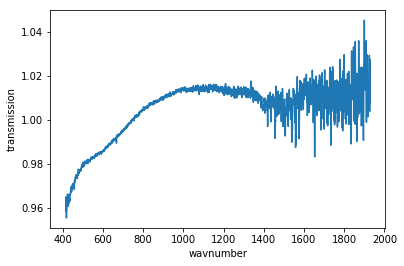

In [37]:
def transmission_fn(temp):
    wavenums_first = np.array(wns_first)
    real_radiances = rad_first
    theory_radiances = []

    for w in wavenums_first:
        theory_radiances.append(planck(w,temp))
    
    def division(real_val,theory_val):
        return real_val/theory_val
    
    division_vec = np.vectorize(division)
    
    ratio = division_vec(real_radiances, theory_radiances)
    plt.plot(wavenums_first, ratio)
    plt.xlabel('wavnumber')
    plt.ylabel('transmission')
    plt.show()
        
transmission_fn(np.average(temps_first))